### Homework 2. Databases

*Polina Artemeva*

I took a table from our Statistics class. It has data on how people in different regions and of different sexes finish the phrase: 'Жадина-говядина....' 1) солёный огурец; 2) турецкий барабан; 3) шоколадина

In [1]:
import pandas as pd
import csv
import sqlite3

In [2]:
df = pd.read_csv('socling.csv', sep=',', encoding='utf-8') # opening the data

In [13]:
df.head() # first five rows

,X,id,region,fdistrict,sex,phrase,phrase.tr,phrase.eng
0,1,9,Moscow,Central,male,соленый огурец,solenyj ogurec,pickle
1,2,1,Moscow,Central,female,соленый огурец,solenyj ogurec,pickle
2,3,3,Moscow,Central,female,соленый огурец,solenyj ogurec,pickle
3,4,7,Moscow,Central,male,соленый огурец,solenyj ogurec,pickle
4,5,3,Moscow,Central,female,соленый огурец,solenyj ogurec,pickle


To create two tables out of one I have decided to divide this data in two: first one will contain phrases and other, and the second one will contain persons, region, etc.

In [5]:
df_phrases = df[['X', 'id', 'phrase', 'phrase.tr', 'phrase.eng'] ] 
df_persons =  df[['X', 'region', 'fdistrict', 'sex'] ]

**Creating a database**

In [6]:
con = sqlite3.connect("socling.db")
c = con.cursor() # to send commands to our database
df_phrases.to_sql(name='phrases', con=con, if_exists='replace')
df_persons.to_sql(name='persons', con=con, if_exists='replace')

Here I connect two tables in one database. 'X' is what connects them, this is a primary key, an index of all participants and related informtion.

In [8]:
for row in c.execute('SELECT * FROM phrases'):
    print(row)

(0, 1, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(1, 2, 1, 'соленый огурец', 'solenyj ogurec', 'pickle')
(2, 3, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(3, 4, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(4, 5, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(5, 6, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(6, 7, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(7, 8, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(8, 9, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(9, 10, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(10, 11, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(11, 12, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(12, 13, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(13, 14, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(14, 15, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(15, 16, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(16, 17, 4, 'турецкий барабан', 'tureckij baraban', 'turkish drum')
(17, 18, 5, 'турецкий

We got a database with all the information and with _SELECT *_ I'm asking to show me all the information from database from table *phrases*, which contains information about  number of a row, index, phrase, its transcription and translation. (Unfortunately I wasn't able to remember what does id mean)

In [8]:
for row in c.execute('SELECT * FROM persons'):
    print(row)

(0, 1, 'Moscow', 'Central', 'male')
(1, 2, 'Moscow', 'Central', 'female')
(2, 3, 'Moscow', 'Central', 'female')
(3, 4, 'Moscow', 'Central', 'male')
(4, 5, 'Moscow', 'Central', 'female')
(5, 6, 'Moscow', 'Central', 'male')
(6, 7, 'Moscow', 'Central', 'male')
(7, 8, 'Moscow', 'Central', 'male')
(8, 9, 'Moscow', 'Central', 'male')
(9, 10, 'Moscow', 'Central', 'male')
(10, 11, 'Moscow', 'Central', 'male')
(11, 12, 'Moscow', 'Central', 'female')
(12, 13, 'Moscow', 'Central', 'male')
(13, 14, 'Moscow', 'Central', 'male')
(14, 15, 'Moscow', 'Central', 'male')
(15, 16, 'Moscow', 'Central', 'female')
(16, 17, 'Moscow', 'Central', 'female')
(17, 18, 'Moscow', 'Central', 'female')
(18, 19, 'Moscow', 'Central', 'female')
(19, 20, 'Moscow', 'Central', 'female')
(20, 21, 'Moscow', 'Central', 'female')
(21, 22, 'Moscow', 'Central', 'female')
(22, 23, 'Moscow', 'Central', 'female')
(23, 24, 'Moscow', 'Central', 'female')
(24, 25, 'Moscow', 'Central', 'male')
(25, 26, 'Moskovskaja oblast', 'Central', '

Same but with _persons_

**Queries**

In [9]:
x = ('male',) #selecting all males
c.execute('SELECT * FROM persons WHERE sex=?', x)
print(c.fetchall())

[(0, 1, 'Moscow', 'Central', 'male'), (3, 4, 'Moscow', 'Central', 'male'), (5, 6, 'Moscow', 'Central', 'male'), (6, 7, 'Moscow', 'Central', 'male'), (7, 8, 'Moscow', 'Central', 'male'), (8, 9, 'Moscow', 'Central', 'male'), (9, 10, 'Moscow', 'Central', 'male'), (10, 11, 'Moscow', 'Central', 'male'), (12, 13, 'Moscow', 'Central', 'male'), (13, 14, 'Moscow', 'Central', 'male'), (14, 15, 'Moscow', 'Central', 'male'), (24, 25, 'Moscow', 'Central', 'male'), (25, 26, 'Moskovskaja oblast', 'Central', 'male'), (27, 28, 'Moskovskaja oblast', 'Central', 'male'), (28, 29, 'Moskovskaja oblast', 'Central', 'male'), (49, 33, 'Samarskaja oblast', 'Volga', 'male'), (50, 47, 'Other', 'Other', 'male'), (51, 51, 'Other', 'Other', 'male'), (52, 45, 'Other', 'Other', 'male'), (53, 52, 'Other', 'Other', 'male'), (54, 53, 'Other', 'Other', 'male'), (55, 58, 'Other', 'Abroad', 'male'), (56, 61, 'Other', 'Far Eastern', 'male'), (57, 62, 'Amurskaja oblast', 'Far Eastern', 'male'), (58, 34, 'Samarskaja oblast', '

I'm asking the database to show me all information about male participants

In [30]:
numbers = []
c.execute('SELECT * FROM phrases WHERE phrase="шоколадина"')
n = len(c.fetchall())
print("шоколадина",n, " раз")
numbers.append(n)

c.execute('SELECT * FROM phrases WHERE phrase="соленый огурец"')
n = len(c.fetchall())
print("соленый огурец",n, " раз")
numbers.append(n)


c.execute('SELECT * FROM phrases WHERE phrase="турецкий барабан"')
n = len(c.fetchall())
print("турецкий барабан",n, " раз")
numbers.append(n)


шоколадина 6  раз
соленый огурец 47  раз
турецкий барабан 10  раз


Here I'm asking my database to show me how many times each ending appears in the table.

In [80]:
c.execute('''SELECT *
        FROM persons
        WHERE X IN(SELECT X 
         FROM phrases
         WHERE phrase = 'соленый огурец')
         AND persons.sex = 'male'   ''') 

for row in c.fetchall():
    print(row)

(0, 1, 'Moscow', 'Central', 'male')
(3, 4, 'Moscow', 'Central', 'male')
(5, 6, 'Moscow', 'Central', 'male')
(6, 7, 'Moscow', 'Central', 'male')
(7, 8, 'Moscow', 'Central', 'male')
(8, 9, 'Moscow', 'Central', 'male')
(9, 10, 'Moscow', 'Central', 'male')
(10, 11, 'Moscow', 'Central', 'male')
(12, 13, 'Moscow', 'Central', 'male')
(13, 14, 'Moscow', 'Central', 'male')
(14, 15, 'Moscow', 'Central', 'male')
(25, 26, 'Moskovskaja oblast', 'Central', 'male')
(27, 28, 'Moskovskaja oblast', 'Central', 'male')
(28, 29, 'Moskovskaja oblast', 'Central', 'male')
(54, 53, 'Other', 'Other', 'male')
(55, 58, 'Other', 'Abroad', 'male')
(56, 61, 'Other', 'Far Eastern', 'male')
(57, 62, 'Amurskaja oblast', 'Far Eastern', 'male')
(58, 34, 'Samarskaja oblast', 'Volga', 'male')
(59, 37, 'Altajskij kraj', 'Far Eastern', 'male')
(60, 46, 'Other', 'Other', 'male')
(61, 56, 'Other', 'Other', 'male')
(62, 60, 'Other', 'Other', 'male')


Here I create a two conditions query to find all males who finished the phrase with 'Солёный огурец'. First condition: FROM phrases WHERE phrase = 'соленый огурец'. Second condition: FROM persons WHERE X IN AND persons.sex = 'male'. Because I have all the needed information in two different tables I send my query to both of this tables, connected with the primary key X.

In [84]:
c.execute('''SELECT region
        FROM persons
        WHERE X IN(SELECT X 
         FROM phrases
         WHERE phrase = 'шоколадина')  ''') 

for row in c.fetchall():
    print(row)

('Respublika Saha (Jakutija)',)
('Samarskaja oblast',)
('Other',)
('Other',)
('Other',)
('Other',)


It was interesting for me to look at the regions where people finished the phrase with 'Шоколадина'. And strangely, they are all from different, not even closely situated (known) regions. And other people, apparently, preferred not to indicate their region, that's why we got so many "Other".

In [23]:
c.execute('''INSERT INTO persons VALUES ('63', '61','Chelyabinsk', 'Sovetsky', 'female') ''')

(0, 1, 'Moscow', 'Central', 'male')
(1, 2, 'Moscow', 'Central', 'female')
(2, 3, 'Moscow', 'Central', 'female')
(3, 4, 'Moscow', 'Central', 'male')
(4, 5, 'Moscow', 'Central', 'female')
(5, 6, 'Moscow', 'Central', 'male')
(6, 7, 'Moscow', 'Central', 'male')
(7, 8, 'Moscow', 'Central', 'male')
(8, 9, 'Moscow', 'Central', 'male')
(9, 10, 'Moscow', 'Central', 'male')
(10, 11, 'Moscow', 'Central', 'male')
(11, 12, 'Moscow', 'Central', 'female')
(12, 13, 'Moscow', 'Central', 'male')
(13, 14, 'Moscow', 'Central', 'male')
(14, 15, 'Moscow', 'Central', 'male')
(15, 16, 'Moscow', 'Central', 'female')
(16, 17, 'Moscow', 'Central', 'female')
(17, 18, 'Moscow', 'Central', 'female')
(18, 19, 'Moscow', 'Central', 'female')
(19, 20, 'Moscow', 'Central', 'female')
(20, 21, 'Moscow', 'Central', 'female')
(21, 22, 'Moscow', 'Central', 'female')
(22, 23, 'Moscow', 'Central', 'female')
(23, 24, 'Moscow', 'Central', 'female')
(24, 25, 'Moscow', 'Central', 'male')
(25, 26, 'Moskovskaja oblast', 'Central', '

In [25]:
c.execute('''INSERT INTO phrases VALUES ('63', '61', '9','соленый огурец', 'solenyj ogurec', 'pickle') ''')
for row in c.execute('SELECT * FROM phrases'):
    print(row)

(0, 1, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(1, 2, 1, 'соленый огурец', 'solenyj ogurec', 'pickle')
(2, 3, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(3, 4, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(4, 5, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(5, 6, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(6, 7, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(7, 8, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(8, 9, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(9, 10, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(10, 11, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(11, 12, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(12, 13, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(13, 14, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(14, 15, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(15, 16, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(16, 17, 4, 'турецкий барабан', 'tureckij baraban', 'turkish drum')
(17, 18, 5, 'турецкий

Here I have added my own personal data, how would I say. Firstly into the first table and then into the next.

In [26]:
c.execute('''INSERT INTO phrases VALUES ('bebe', 'nono', 'haha','byebye', 'whywhy', 'shhh') ''')

In [27]:
for row in c.execute('SELECT * FROM phrases'):
    print(row)

(0, 1, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(1, 2, 1, 'соленый огурец', 'solenyj ogurec', 'pickle')
(2, 3, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(3, 4, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(4, 5, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(5, 6, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(6, 7, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(7, 8, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(8, 9, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(9, 10, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(10, 11, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(11, 12, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(12, 13, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(13, 14, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(14, 15, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(15, 16, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(16, 17, 4, 'турецкий барабан', 'tureckij baraban', 'turkish drum')
(17, 18, 5, 'турецкий

But then some trickster added some useless information into my database, so I immediately must delete it!

In [28]:
c.execute('''DELETE FROM phrases WHERE X='nono' ''')
for row in c.execute('SELECT * FROM phrases'):
    print(row)

(0, 1, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(1, 2, 1, 'соленый огурец', 'solenyj ogurec', 'pickle')
(2, 3, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(3, 4, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(4, 5, 3, 'соленый огурец', 'solenyj ogurec', 'pickle')
(5, 6, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(6, 7, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(7, 8, 8, 'соленый огурец', 'solenyj ogurec', 'pickle')
(8, 9, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(9, 10, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(10, 11, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(11, 12, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(12, 13, 10, 'соленый огурец', 'solenyj ogurec', 'pickle')
(13, 14, 7, 'соленый огурец', 'solenyj ogurec', 'pickle')
(14, 15, 9, 'соленый огурец', 'solenyj ogurec', 'pickle')
(15, 16, 4, 'соленый огурец', 'solenyj ogurec', 'pickle')
(16, 17, 4, 'турецкий барабан', 'tureckij baraban', 'turkish drum')
(17, 18, 5, 'турецкий

It worked out! Yes! I have deleted the useless row!

**Plotting**

To create plots of my data I have decided to use _seaborn_ library.

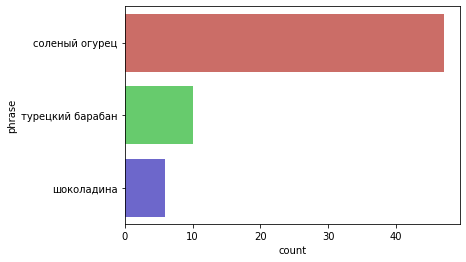

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='phrase', data=df_phrases, palette="hls")

Here we count how many times we meet each ending of the phrase. Obviously, _солёный огурец_ is the most frequent one.

In [13]:
c.execute('''SELECT phrases.phrase, persons.sex 
               FROM phrases                    
               INNER JOIN persons ON phrases.X=persons.X;''')

for row in c.fetchall():
    print(row)

('соленый огурец', 'male')
('соленый огурец', 'female')
('соленый огурец', 'female')
('соленый огурец', 'male')
('соленый огурец', 'female')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'female')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'female')
('турецкий барабан', 'male')
('соленый огурец', 'male')
('соленый огурец', 'female')
('соленый огурец', 'male')
('соленый огурец', 'male')
('соленый огурец', 'female')
('соленый огурец', 'female')
('соленый огурец', 'female')
('соленый огурец', 'female')
('соленый огурец', 'female')
('соленый огурец', 'female

Joining values from different tables to create another plot.

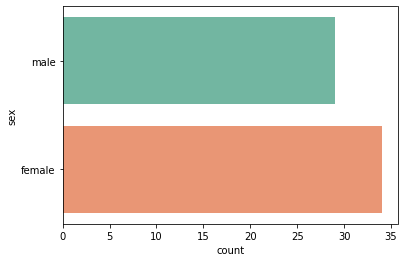

In [33]:
sns.countplot(y='sex', data=df_persons, palette="Set2")

Here we can see who finishes their phrases with _солёный огурец_ more frequently. Slightly more often women do that but statistically this number is insignificant.

In [15]:
c.execute('''SELECT phrases.phrase, persons.region 
               FROM phrases                    
               INNER JOIN persons ON phrases.X=persons.X
               WHERE phrases.phrase = "турецкий барабан"''')

for row in c.fetchall():
    print(row)

('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Moscow')
('турецкий барабан', 'Other')


I wanted to know where people use _турецкий барабан_. Turns out, that almost exclusively in Moscow.

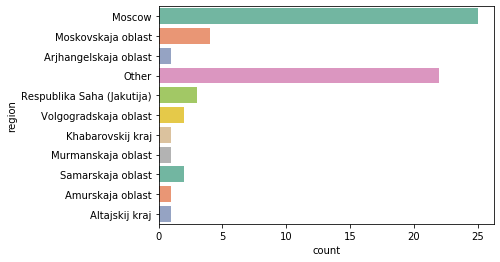

In [32]:
sns.countplot(y='region', data=df_persons, palette="Set2")

This plot shows how many regions participated in the research.

In the next part of the code I have created lists for each endidng out of the three of them. In each list there are regions where this ending was used and how many times.

In [41]:
c.execute('''SELECT region
        FROM persons
        WHERE X IN(SELECT X 
         FROM phrases
         WHERE phrase = 'соленый огурец')''')

pickle_regions = []
for row in c.fetchall():
    pickle_regions.append(row)

c.execute('''SELECT region
        FROM persons
        WHERE X IN(SELECT X 
         FROM phrases
         WHERE phrase = 'турецкий барабан')''')

drum_regions = []
for row in c.fetchall():
    drum_regions.append(row)

c.execute('''SELECT region
        FROM persons
        WHERE X IN(SELECT X 
         FROM phrases
         WHERE phrase = 'шоколадина')''')

chocolate_regions = []
for row in c.fetchall():
    chocolate_regions.append(row)

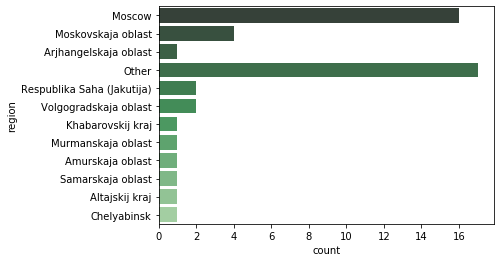

In [42]:
pickle = pd.DataFrame(pickle_regions, columns=['region'])

sns.countplot(y='region', data=pickle, palette="Greens_d")

Here we see how many times and where was _солёный огурец_ used.

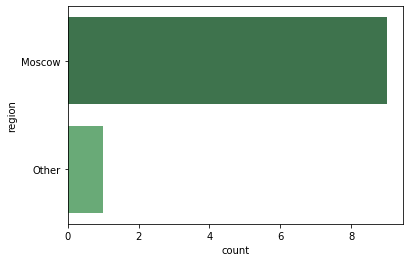

In [43]:
drum = pd.DataFrame(drum_regions, columns=['region'])

sns.countplot(y='region', data=drum, palette="Greens_d")

The same here but with _турецкий барабан_. If we compare this plot and the previous one we will see that even though Moscow is the leader in finishing the phrase with *турецкий барабан*, it is stil not the most popular ending in the city.

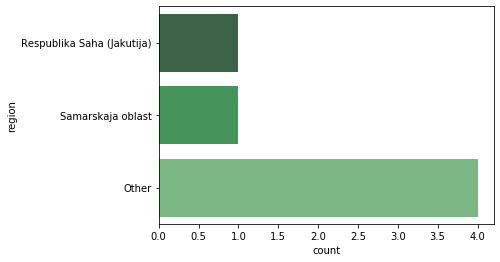

In [44]:
chocolate = pd.DataFrame(chocolate_regions, columns=['region'])

sns.countplot(y='region', data=chocolate, palette="Greens_d")

And finally, a plot with a couple of strange people that finish the phrase with _шоколадина_.

Just in case:
A way how to count how many times each ending occur.  

In [45]:
c.execute('''SELECT COUNT(*) 
        FROM phrases
        WHERE X IN(SELECT X 
         FROM persons
         WHERE region = 'Moscow')
         AND phrases.phrase = 'соленый огурец'   ''') 
for row in c.fetchall():
    print(row)

(16,)


In [46]:
c.execute('''SELECT COUNT(*)
         FROM phrases
         WHERE phrases.X IN(SELECT X
         FROM persons
         WHERE region = 'Moscow')
         AND phrases.phrase = 'турецкий барабан'   ''')

for row in c.fetchall():
    print(row)

(9,)


# Final project

I am not yet sure what I would like to do. I have a crazy idea about creating an app (or, for now, writing a code) that would identify language. Some kind of Shazam for languages. I know, that is too enthusiastic. It is a good idea to start with trying to write a code that would identify language by a written text, kind of what Google Translate does. This is why I am interested in speech recognition. So, I think I am gonna try to do something in this area but I need to elaborate on the plan of the project more. I will try to do it in the following week.